In [1]:
%matplotlib widget
from sklearn.decomposition import PCA
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
import numpy as np
import matplotlib.pyplot as plt

from data.unucoupled_double_pendulum import generate_uncoupled_pendulum
from data.coupled_double_pendulum import generate_coupled_pendulum
from src.tda.takens_embedding import takens_embedding

In [2]:
def plot_time_series(theta, phi, title):
    t = np.arange(len(theta))
    plt.figure(figsize=(8, 3))
    plt.plot(t, theta, label=r"$\theta$")
    plt.plot(t, phi, label=r"$\phi$")
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()

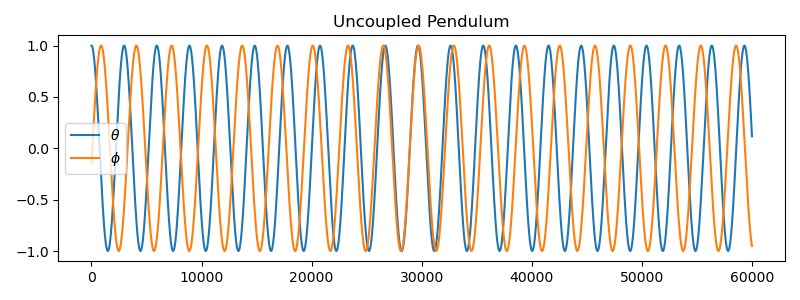

In [3]:
data_combined_uncoupled, theta_uncoupled, phi_uncoupled = generate_uncoupled_pendulum(N = 1, spacing = 2000)[0:3]
data_combined_coupled, theta_coupled, phi_coupled = generate_coupled_pendulum(N = 1, spacing = 2000)[0:3]

# Plot time series
plot_time_series(theta_coupled[0], phi_coupled[0], "Coupled Pendulum")
plot_time_series(theta_uncoupled[0], phi_uncoupled[0], "Uncoupled Pendulum")

In [4]:
# compute Takens embedding and their PCA projections for 3d plots
X_c = takens_embedding(data_combined_coupled, N=1, embedding_dimension=6)
X_u = takens_embedding(data_combined_uncoupled, N=1, embedding_dimension=6)

X_c_a = np.array(X_c[0])
pca = PCA(n_components=3)
X_c_a_pca = pca.fit_transform(X_c_a)

X_u_a = np.array(X_u[0])
pca = PCA(n_components=3)
X_u_a_pca = pca.fit_transform(X_u_a)

In [ ]:
# Visualization for coupled time series embedding
plot_point_cloud(X_c_a_pca, dimension=3)
# this is a torus!


In [6]:
# Visualization for uncoupled time series embedding
plot_point_cloud(X_u_a_pca, dimension=3)